# Warmup 10-13-2020
### Kwame V. Taylor

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

plt.rc('figure', figsize=(10, 8))
plt.rc('font', size=14)

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

## df1
For df1:
* Take a look at the data in df1.
* Does x increase from time one to time two?
* Visualize the relationship between x and time.
* Run a statistical test to further examine the relationship between these features.

In [3]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [36]:
df1.x.mean()

6.511558766196372

In [22]:
df_onetime = df1[df1['time'] == 'one']
df_twotime = df1[df1['time'] == 'two']
print('One time:', df_onetime.x.mean())
print('Two time:', df_twotime.x.mean())
print('Yes, x increases from time one to time two.')

One time: 5.726669425801799
Two time: 7.296448106590939
Yes, x increases from time one to time two.


<function matplotlib.pyplot.show(*args, **kw)>

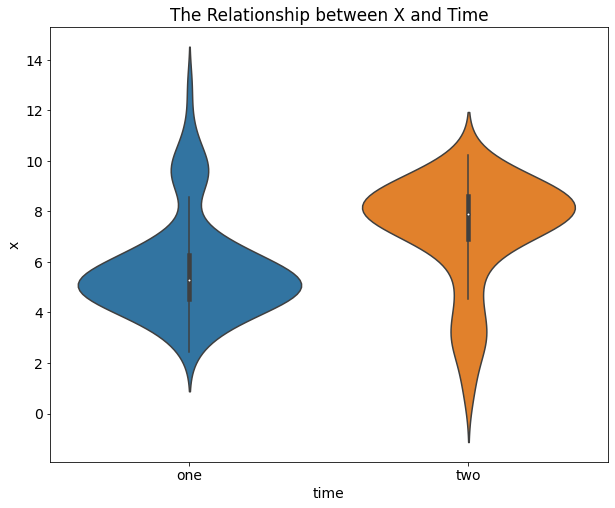

In [71]:
sns.violinplot(data=df1, y=df1.x, x=df1.time)
plt.title('The Relationship between X and Time')

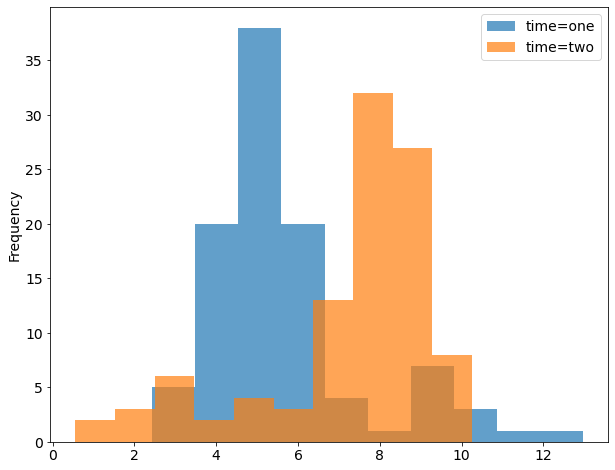

In [70]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two', ax=ax, alpha=.7)
ax.legend()

In [58]:
df1.groupby(['group', 'time']).x.mean()

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [62]:
df1.groupby(['group', 'time']).size()

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

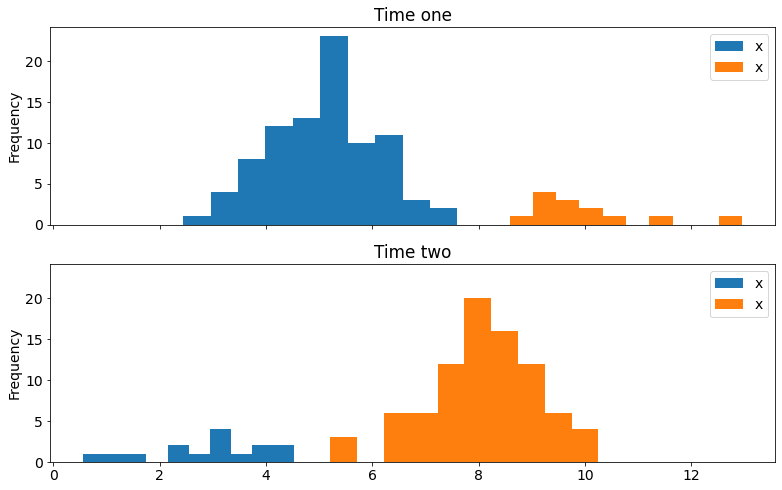

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(13, 8), sharex=True, sharey=True)

df1.query('group == "a" & time == "one"').plot.hist(ax=ax1, label='a')
df1.query('group == "b" & time == "one"').plot.hist(ax=ax1, label='b')
ax1.set(title='Time one')
ax1.legend()
df1.query('group == "a" & time == "two"').plot.hist(ax=ax2, label='a')
df1.query('group == "b" & time == "two"').plot.hist(ax=ax2, label='b')
ax2.set(title='Time two')
ax2.legend()

* The average x value is higher at time two compared to time one.
* The average x value is lower for both groups at time two compared to time one.

### Two-Sample T-Test:

$
\begin{align*}
   H_0 & : \text{There is no difference in the x values for observations with time one and observations without time one.}
   \\
   H_a & : \text{There is a difference in the x values for observations with time one and observations without time one.}
   \\
    \alpha & : \text{0.05}
\end{align*}
$

In [40]:
x1 = df1[df1.time == 'one'].x
x2 = df1[df1.time != 'one'].x

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=-5.443902721870272, pvalue=1.5320971681720527e-07)

The p-value is less than the alpha, so we fail to reject the null hypothesis that there is no difference in the x values for observations with time one and observations without time one.

## df2

For df2:
* Take a look at the data in df2.
* Visualize the relationship between x and y.
* How would you describe the relationship between x and y?
* Run a statistical test to examine the relationship between x and y.

In [45]:
df2.head(2)

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a


In [44]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


p= 1.3960403186191819e-18


[Text(0.5, 1.0, 'r = 0.5694')]

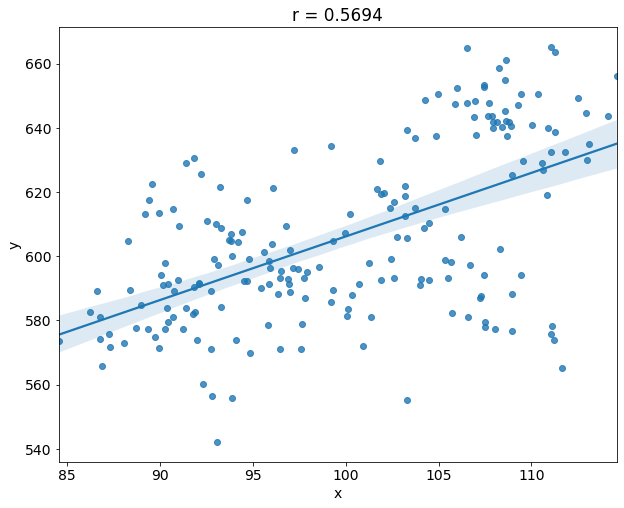

In [66]:
r, p = stats.pearsonr(df2.x, df2.y)
print('p=', p)
ax = sns.regplot(data=df2, y='y', x='x')
ax.set(title=f'r = {r:.4f}')

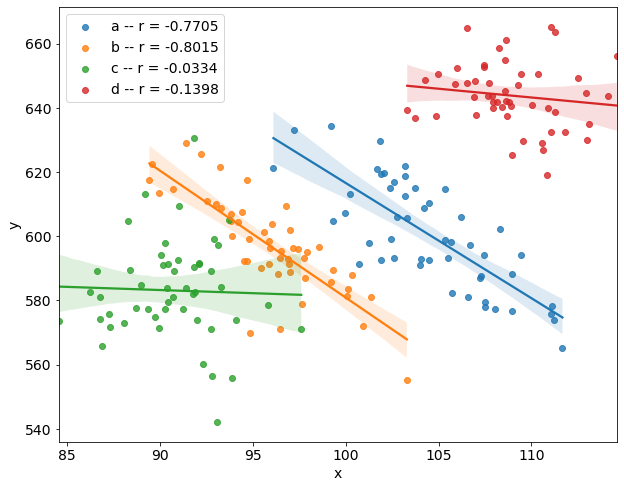

In [67]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label=f'{group} -- r = {r:.4f}')
plt.legend()

### Simpson's Paradox

When a relationship between 2 variables reverses itself when controlling for a third variable.

## df3

instructions

In [51]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [52]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

In [53]:
df3.groupby(['surgeon', 'surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

We should choose surgeon B for a heart bypass surgery.